## <center>Problem Sheet #6</center>

<img src="holiday2.gif" width="700">

<br>

## Practical error estimation (<a href="https://en.wikipedia.org/wiki/Richardson_extrapolation">Richardson</a> extrapolation)
<br>

<b>Problem 1.</b> Let us condsider the IVP

\begin{cases}
u'(t)= -u^2(t),&\\
u(1)=1. &
\end{cases}

Then the analytical solution is $u(t)=\frac{1}{t}$. 

Let us apply the Richardson extrapolation combined with RK4 method to this problem. Estimate from the analytical solution the order of convergence in maximum norm. Can we see that the expected order of convergence is five?


In [2]:
%% Richardson extrapolation combine with RK4

p=4; % Order of RK4
N=16;
for j=1:6
    a=1;
    b=10;
    f=@(t,y)[-y.^2];
    y0=[1];
    [h1,t1,y2]=RK4system(a,b,f,y0,N*2^(j)); %h
    [h2,t,w]=RK4system(a,b,f,y0,N*2^(j-1)); %2h
    exact=1./t;
    y2=y2(1:2:end);
    y=y2+(y2-w)/(2^p-1); %The learned formula for Richardson extrapolation
    norm_max(j)=norm(exact-y,'inf');
end

for j=1:length(norm_max)-1
    order_max(j)=log2(norm_max(j)/norm_max(j+1))-1;
end
order_max

order_max =

   5.2877   5.3160   5.1640   5.0833   5.0268



<br>

<b>Problem 2.</b> [Extra] Write a general ERK solver and test it on the previous problem.
<br><br>

## Variable step-size methods
<br>

### Embedded ERK methods and automatic step-size selection ( #1)
<br>

<b>Problem 3.</b> Let us consider the Assignment (Problem 6.) from Problem Sheet #4. Apply the the learned FSAL RK4 3/8 embedded method to this problem. Plot how the step-size changes in the first 30 second in case of the intital step-size $h_0=1.3$ with tolareance $TOL=10^{-5}$. What can we experince if we change $h_0$?

min_max_h =

   0.020000   0.947596



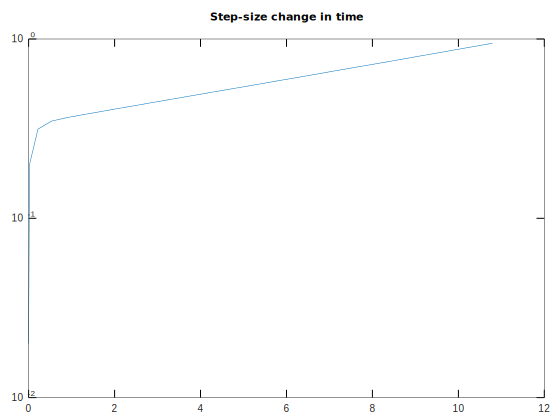

In [10]:
% FSAL RK4 3/8 Butcher tableau and corresponding orders
A = [0 0 0 0 0; 1/3 0 0 0 0; -1/3 1 0 0 0; 1 -1 1 0 0; 1/8 3/8 3/8 1/8 0];
b = [1/8 3/8 3/8 1/8 0];
bhat = [1/12 1/2 1/4 0 1/6];
p=4; %phat=3;

% Problem data
t0 = 0;
tfin = 10;
L = 2;
V1 = 10;
V2 = 5;
f = @(t,y) [-L/V1*y(1); -L/V2*(y(2)-y(1))];
y0=[0.3; 0];

% Initial Step-size and tolerance selection
h0=0.020;
TOL=1e-5;


[h, t, y]=EmbeddedERKsys(t0,tfin,f,y0,A,b,bhat,p,h0,TOL);
min_max_h=[min(h), max(h)]
plot(t,h)
semilogy(t,h)
title('Step-size change in time')

<br>

<b>Problem 4.</b> <a href="https://en.wikipedia.org/wiki/Brusselator">Brusselator</a> is a theoretical model for a type of autocatalytic reaction (1971). The name of the model is coming from a portmanteau of Brussels and oscillator. The simplified system in case ot two reactions is

\begin{cases}
u_1'(t)=A+u_1(t)^2u_2(t)-(B+1)u_1(t)&\\
u_2'(t)=Bu_1(t)-u_1(t)^2u_2(t)
\end{cases}

where $A$ and $B$ are positive constants. Let us choose the contants as $A=1$ and $B=3$ and the initial values as $u_1(0)=1.5$ and $u_2(t)=3$.<br><br>

Apply the the learned FSAL RK4 3/8 embedded method to this problem. Plot the numerical solution and plot how the step-size changes in the first 20 second in case of the intital step-size $h_0=0.001$ with tolareance $TOL=10^{-6}$. 


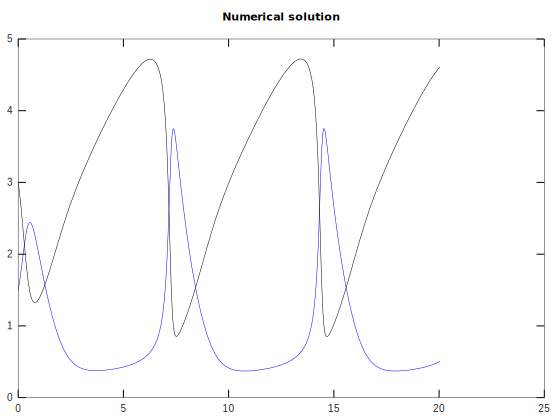

In [8]:
t0=0;
tfin=20;
f=@(t,y)[1+(y(1)).^2.*y(2)-4*y(1); 3*y(1)-(y(1)).^2.*y(2)];
y0=[1.5; 3];
A=[0 0 0 0 0; 1/3 0 0 0 0; -1/3 1 0 0 0; 1 -1 1 0 0; 1/8 3/8 3/8 1/8 0];
b=[1/8 3/8 3/8 1/8 0];
bhat=[1/12 1/2 1/4 0 1/6];
p=4;
%phat=3;
h0=0.001;
TOL=1e-6;
[h, t, y]=EmbeddedERKsys(t0,tfin,f,y0,A,b,bhat,p,h0,TOL);
plot(t,y(1,:),'b',t,y(2,:),'k')
title('Numerical solution')

min_max_h =

   0.0010000   0.1444549



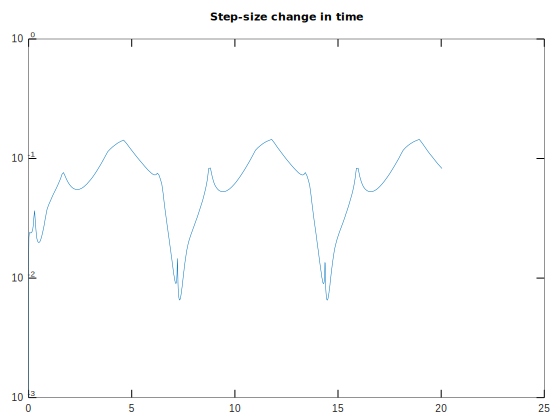

In [9]:
min_max_h=[min(h), max(h)]
semilogy(t,h)
title('Step-size change in time')

<br>

<b>Problem 5.</b> [Extra] The circular restricted <a href="https://en.wikipedia.org/wiki/Three-body_problem">three-body problem</a> models the motion of a massless body orbiting around the baricentre of two massive bodies on a co-planar circular orbit. The motion is studied in a co-rotating coordinate system, where the baricentre is in the origin, and the massive bodies have the coordinats $(-\mu,\ 0)$ and $(1-\mu,\ 0)$, where $\mu=(m_1)/(m_1+m_2)$ is the mass ration between the masses $m_1>m_2$.
<br><br>

The equations of motion refer to the position $x(t)$, $y(t)$ of the test particle (e.g. satellite in the Earth-Moon system, asteroid in the Sun-Jupiter system, etc.):

$$x''(t)=x(t)+2y'(t)-(1-\mu)\frac{x(t)+\mu}{D_1}-\mu\frac{x(t)-(1-\mu)}{D_2}$$
$$y''(t)=y(t)-2x'(t)-y(t)\Bigg(\frac{1-\mu}{D_1}+\frac{\mu}{D_2}\Bigg),$$

where

$$D_1=((x(t)+\mu)^2+y^2(t))^{3/2}$$
$$D_2=((x(t)-(1-\mu)^2)^2+y^2(t))^{3/2}$$
$$\mu=\frac{m_1}{m_1+m_2}$$

Here t refers to the “time” which equals $t =nt^*$ where $n$ is the angular velocity of the massive bodies around the baricentre and $t^*$ is the real time.<br><br>

Write the problem as a first order system in order of position and velocity variables. Apply the following embdedd RK3(2) method.
<table style="text-align: center" cellpadding="3px" cellspacing="0px">
<tr>
<td style="border-right:1px solid;">0</td>
</tr>
<tr>
<td style="border-right:1px solid;">1/2</td>
<td >1/2</td>
</tr>
<tr>
<td style="border-right:1px solid; border-bottom:1px solid;">1</td>
<td style="border-bottom:1px solid;">-1</td>
<td style="border-bottom:1px solid;">2</td>
<td style="border-bottom:1px solid;"></td>
</tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>1/6</td>
<td>2/3</td>
<td>1/6</td>
</tr>
<tr>
<td style="border-right:1px solid;"></td>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>
</table>
<br> 

Study some of the peridodic orbits in the Earth-Moon system ($\mu = 0.012277471$) which were found by Richard Arenstorf in 1963. The initial values and the corresponding are the following.<br><br>

+ 2-loop case: $[1.2\ 0\ 0\ −1.049357510]'$ and $6.192169331$
+ 3-loop case: $[0.994\ 0\ 0\ −2.0317326295573368357302057924]'$ and $11.124340337266085134999734047$
+ 4-loop case: $[0.994\ 0\ 0\ −2.00158510637908252240537862224]'$ and $17.0652165601579625588917206249$


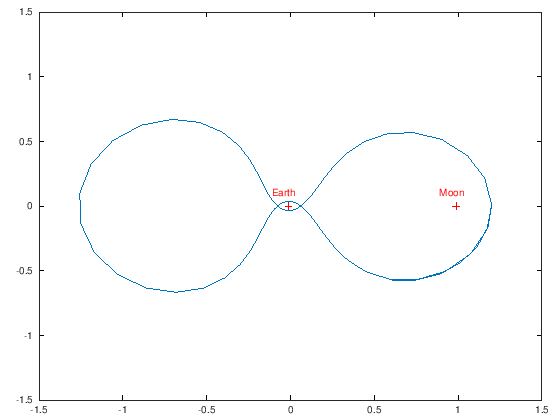

In [1]:
% 2-loop case
y=restthreebody(2,1e-5,1e-2,1);

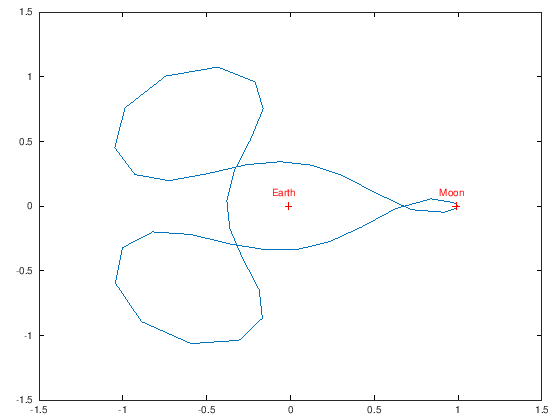

In [2]:
% 3-loop case
y=restthreebody(3,1e-5,1e-2,1);

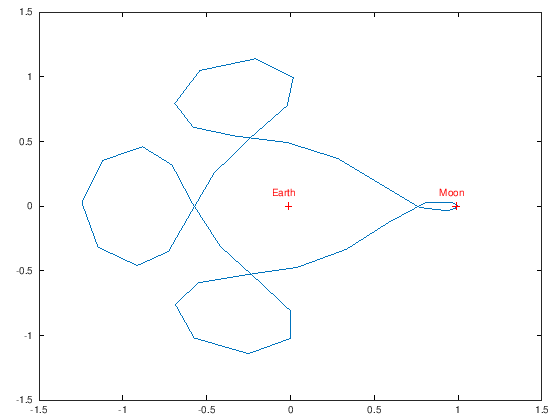

In [3]:
% 4-loop case
y=restthreebody(4,1e-5,1e-2,1);

### Embedded ERK methods and automatic step-size selection ( #2)
<br>

We are following the subsections "Automatic step-size control" and  "Starting step-size" of Section II.4. of <a href="https://en.wikipedia.org/wiki/Ernst_Hairer">Hairer</a>, Norsett, Wanner's book. 
<br><br>

<b>Problem 6.</b> Let us consider the Brusselator problem with the previous configuration in terms of initial values and $A,\ B$ parameters. Apply the the learned FSAL RK4 3/8 embedded method to this problem with the following specifications:

+ fac=0.9
+ facmin=0.5
+ the described starting step-size strategy from Hairer, Norsett, Wanner


Plot the numerical solution and plot how the step-size changes in the first 20 seconds. What is the number of rejected steps?

number_of_steps =  93
rejected_steps =  30


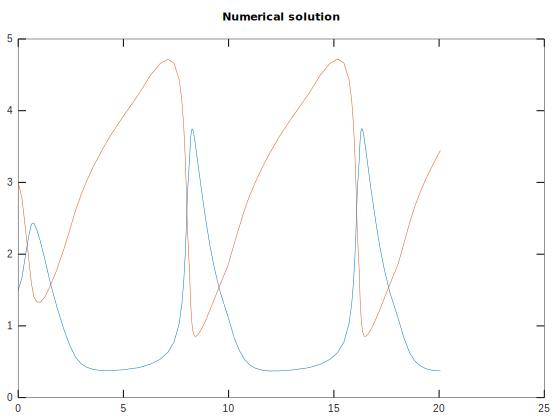

In [12]:
[t,y,h]=Brusselator38Rc(1e-4,1e-4);
plot(t,y(1,:),t,y(2,:))
title('Numerical solution')

    __plt__>__plt2vv__ at line 495 column 10
    __plt__>__plt2__ at line 242 column 14
    __plt__ at line 107 column 18
    semilogy at line 60 column 10


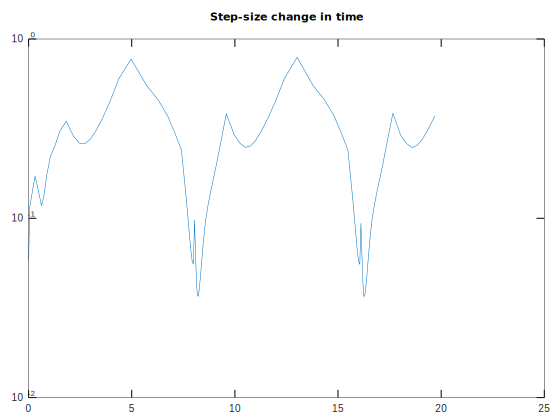

In [13]:
semilogy(t,h)
title('Step-size change in time')

### Smooth deformation map
<br>

<b>Problem 7.</b> Write a code which demonstrate the effect of a smooth deformation map. For example the y-label and x-label correspond the uniform and nonuniform grids, respectively. Plot also the smooth deformation map $\Phi$.<br>

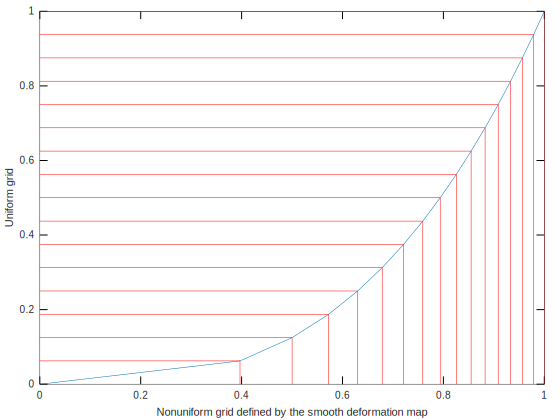

In [16]:
% An example
N=16;
t=linspace(0,1,N+1);
Phit=t.^(1/3);

%Plot
plot(Phit,t)
hold on
x_line=t;   
y_line=interp1(t,Phit,x_line);
y_lim=get(gca,'ylim');
ymax=y_lim(1);
for k=1:numel(x_line)
  plot([y_line(k) ymax],[x_line(k),x_line(k)],'r',[y_line(k),y_line(k)],[x_line(k) ymax],'r');
  xlabel('Nonuniform grid defined by the smooth deformation map')
  ylabel('Uniform grid')
end
hold off

<br>

<b>Problem 8.</b> Apply this smooth deformation map technique with $\Phi=t^7$ to Problem 5. from Problem Sheet $\#$4.

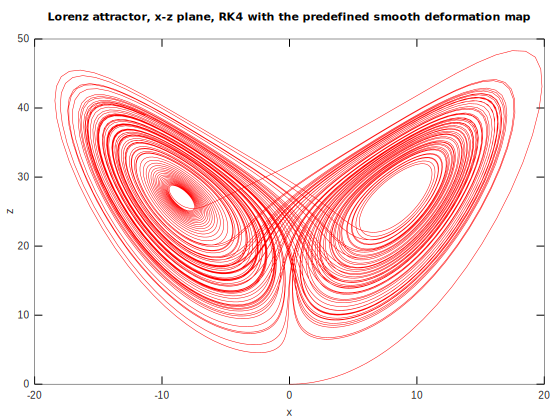

In [14]:
a=0; b=100;
N=10000;
tt=linspace(a,b,N+1);  
t =tt.^(7);
[h, t, y]=RK4sysgriddef(a,b,[0; 1; 0],N,t);
plot(y(1,:),y(3,:),'r-')
xlabel('x')
ylabel('z')
title('Lorenz attractor, x-z plane, RK4 with the predefined smooth deformation map')
